## Data preprocessing, model training and evaluation.

### 1. Reading the data
We work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

!wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

--2023-10-27 19:43:32--  https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv’

car_data.csv        100%[===================>]  57.01K  --.-KB/s    in 0.006s  

2023-10-27 19:43:32 (9.01 MB/s) - ‘car_data.csv’ saved [58374/58374]



In [ ]:
!pip install scikit-plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scikitplot.metrics import plot_roc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

0    1   2    3    4   5   6    7   8   9    10   11   12   13  14  15  \
0   292   87  42   76  159  65   5  155  42  19  138  184  362  157  76   6   
1    50   78  38   63  115  51   6  142  47  19  130  162  299  146  77   2   
2   757   91  43   72  142  56   7  149  45  19  140  168  327  165  72  13   
3   220   99  55  101  206  62  13  222  30  25  180  225  722  213  71   2   
4   562  113  53   93  197  62  11  216  31  24  165  221  688  196  72   6   
5   196  107  56  104  231  71  11  219  31  25  172  226  705  217  71  19   
6   452   92  38   74  178  62   9  161  41  20  135  181  388  132  63   7   
7   626   83  44   70  166  69   5  143  46  18  143  166  306  170  69   7   
8   718  104  52  110  172  53  10  219  30  25  166  235  711  218  74  10   
9   399   87  42   64  150  64  10  133  50  18  141  157  265  159  67   7   
10  404  103  48  101  204  62  12  200  33  23  158  215  595  164  66   8   
11  529   86  43   61  119  53   8  150  46  19  144  169  326  172  85   8   
12  183   84  35   53  122  57   4  116  59  17  123  135  196  128  76  10   
13  156   85  36   78  149  55   7  147  45  19  128  168  321  134  64  10   
14   58  107  53  103  221  66  11  209  32  24  163  222  653  212  66   0   

    16   17   18  
0   12  189  193  
1    4  181  185  
2   23  186  191  
3    3  186  196  
4   25  188  199  
5   11  189  196  
6   29  197  206  
7    6  188  193  
8   28  188  198  
9    0  193  201  
10  22  192  202  
11   8  179  182  
12  27  183  190  
13  24  197  203  
14   1  191  201

Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

0          1           2           3           4           5   \
count  549.000000  549.00000  549.000000  549.000000  549.000000  549.000000   
mean   420.584699   93.76867   45.020036   82.382514  169.377049   61.743169   
std    240.118741    8.29119    6.082279   15.662130   33.541372    8.247405   
min      0.000000   73.00000   33.000000   40.000000  110.000000   47.000000   
25%    214.000000   88.00000   40.000000   70.000000  141.000000   57.000000   
50%    417.000000   93.00000   45.000000   80.000000  166.000000   61.000000   
75%    626.000000  100.00000   50.000000   98.000000  197.000000   65.000000   
max    843.000000  119.00000   58.000000  110.000000  333.000000  138.000000   

               6           7           8           9           10          11  \
count  549.000000  549.000000  549.000000  549.000000  549.000000  549.000000   
mean     8.657559  169.657559   40.704918   20.630237  148.542805  189.566485   
std      4.759857   33.102077    7.706310    2.592077   14.458867   31.532882   
min      3.000000  112.000000   26.000000   17.000000  118.000000  130.000000   
25%      7.000000  147.000000   33.000000   19.000000  138.000000  168.000000   
50%      8.000000  157.000000   43.000000   20.000000  146.000000  179.000000   
75%     10.000000  200.000000   46.000000   23.000000  160.000000  217.000000   
max     52.000000  265.000000   61.000000   29.000000  188.000000  320.000000   

                12          13          14          15          16  \
count   549.000000  549.000000  549.000000  549.000000  549.000000   
mean    443.805100  175.883424   72.626594    6.344262   12.486339   
std     176.674286   32.367431    7.693306    4.893750    8.750928   
min     184.000000  112.000000   59.000000    0.000000    0.000000   
25%     320.000000  150.000000   67.000000    2.000000    6.000000   
50%     366.000000  174.000000   72.000000    6.000000   11.000000   
75%     602.000000  198.000000   76.000000    9.000000   18.000000   
max    1018.000000  268.000000  135.000000   22.000000   39.000000   

               17          18  
count  549.000000  549.000000  
mean   188.834244  195.591985  
std      6.117451    7.363924  
min    176.000000  181.000000  
25%    184.000000  191.000000  
50%    188.000000  197.000000  
75%    193.000000  201.000000  
max    204.000000  211.000000

In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


In [ ]:
y_train

array(['bus', 'saab', 'saab', 'opel', 'saab', 'saab', 'opel', 'bus',
       'opel', 'van', 'opel', 'bus', 'saab', 'opel', 'opel', 'opel',
       'van', 'van', 'bus', 'bus', 'saab', 'bus', 'bus', 'opel', 'saab',
       'opel', 'saab', 'saab', 'bus', 'saab', 'saab', 'opel', 'opel',
       'saab', 'opel', 'opel', 'saab', 'opel', 'opel', 'saab', 'opel',
       'bus', 'van', 'van', 'van', 'van', 'bus', 'bus', 'saab', 'van',
       'bus', 'saab', 'opel', 'van', 'van', 'bus', 'bus', 'opel', 'van',
       'bus', 'opel', 'saab', 'van', 'opel', 'saab', 'bus', 'opel', 'bus',
       'saab', 'opel', 'saab', 'saab', 'opel', 'bus', 'bus', 'opel',
       'bus', 'van', 'bus', 'saab', 'van', 'van', 'van', 'saab', 'opel',
       'bus', 'opel', 'van', 'opel', 'bus', 'van', 'opel', 'saab', 'saab',
       'opel', 'saab', 'van', 'van', 'van', 'van', 'bus', 'bus', 'bus',
       'bus', 'opel', 'opel', 'opel', 'saab', 'opel', 'opel', 'saab',
       'opel', 'van', 'bus', 'bus', 'van', 'opel', 'opel', 'saab', 'sa

### 2. Machine Learning pipeline
Here we are supposed to perform the desired transformations.

#### 2.0. Data preprocessing
* We'll make some transformations of the dataset (if necessary).

The data presented to us is very scattered, which is not good for error through the l2 norm. Therefore, we need to bring this data into a range from 0 to 1 so that the model can perceive it better and, as a result, learn better.

In [ ]:
preprocessing = MinMaxScaler()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.fit_transform(X_test)
pd.DataFrame(X_train).head(5)

0         1     2         3         4         5         6         7   \
0  0.346382  0.304348  0.36  0.514286  0.219731  0.197802  0.040816  0.281046   
1  0.059312  0.108696  0.20  0.328571  0.022422  0.043956  0.061224  0.196078   
2  0.897983  0.391304  0.40  0.457143  0.143498  0.098901  0.081633  0.241830   
3  0.260973  0.565217  0.88  0.871429  0.430493  0.164835  0.204082  0.718954   
4  0.666667  0.869565  0.80  0.757143  0.390135  0.164835  0.163265  0.679739   

         8         9         10        11        12        13        14  \
0  0.457143  0.166667  0.285714  0.284211  0.213429  0.288462  0.223684   
1  0.600000  0.166667  0.171429  0.168421  0.137890  0.217949  0.236842   
2  0.542857  0.166667  0.314286  0.200000  0.171463  0.339744  0.171053   
3  0.114286  0.666667  0.885714  0.500000  0.645084  0.647436  0.157895   
4  0.142857  0.583333  0.671429  0.478947  0.604317  0.538462  0.171053   

         15        16        17        18  
0  0.272727  0.307692  0.464286  0.400000  
1  0.090909  0.102564  0.178571  0.133333  
2  0.590909  0.589744  0.357143  0.333333  
3  0.090909  0.076923  0.357143  0.500000  
4  0.272727  0.641026  0.428571  0.600000

In [ ]:
preprocessing = LabelEncoder()
y_train = preprocessing.fit_transform(y_train)
y_test = preprocessing.fit_transform(y_test)
pd.DataFrame(y_train).head(5)

0
0  0
1  2
2  2
3  1
4  2

#### 2.1. Basic logistic regression

In [ ]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid = {'C':[0.01, 0.1, 0.5, 1, 5, 10, 50, 100], 'random_state':[42], 'penalty':['l1', 'l2']}
lr_grid = GridSearchCV(lr, grid, n_jobs=-1, cv=3)
lr_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'penalty': ['l1', 'l2'], 'random_state': [42]})

In [ ]:
best_estim_lr = lr_grid.best_estimator_

print('Best score: ', lr_grid.best_score_)
print('Best params: ', lr_grid.best_params_)
print('Train:')
print('accuracy: ', accuracy_score(y_train, best_estim_lr.predict(X_train)))
print('f1 score: ', f1_score(y_train, best_estim_lr.predict(X_train), average='weighted'))

print('Test:')
print('accuracy: ', accuracy_score(y_test, best_estim_lr.predict(X_test)))
print('f1 score: ', f1_score(y_test, best_estim_lr.predict(X_test), average='weighted'))

Best score:  0.7723132969034608
Best params:  {'C': 100, 'penalty': 'l2', 'random_state': 42}
Train:
accuracy:  0.8032786885245902
f1 score:  0.8008157959511026
Test:
accuracy:  0.7070707070707071
f1 score:  0.706899480016857


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

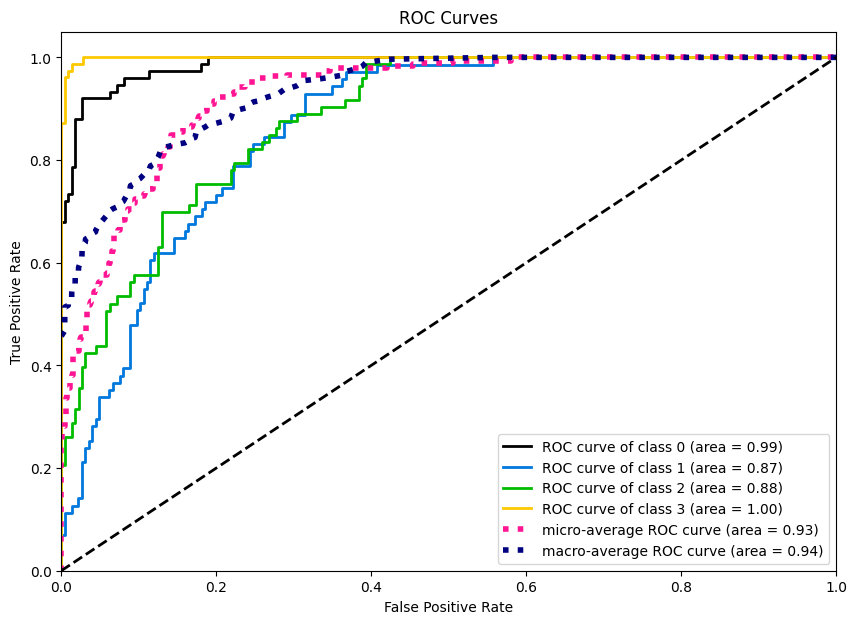

In [ ]:
plot_roc(y_test, best_estim_lr.predict_proba(X_test), figsize=(10, 7))

#### 2.2. PCA: explained variance plot

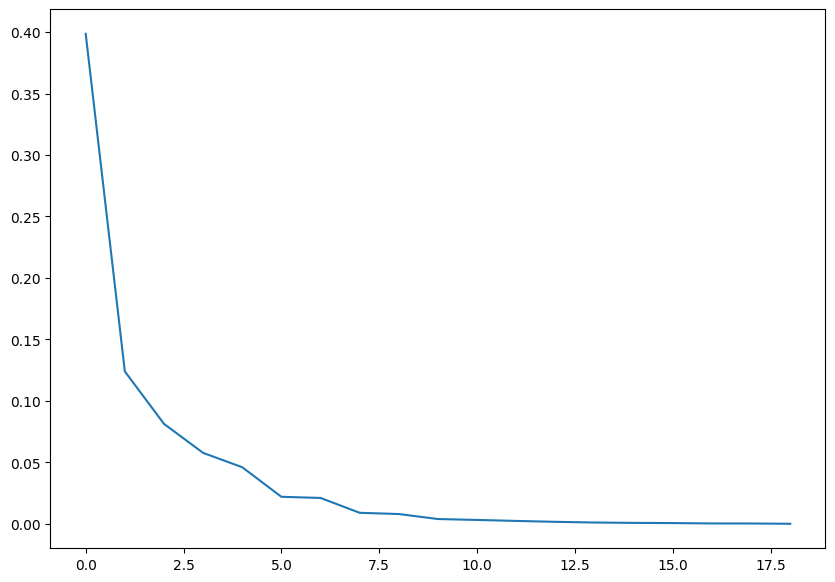

In [ ]:
pca = PCA()
pca.fit(X_train)
plt.figure(figsize=(10, 7))
plt.plot(np.arange(19), pca.explained_variance_)

#### 2.3. PCA trasformation

In [ ]:
lines = [
    ("normilizer", StandardScaler()),
    ("PCA", PCA(n_components=12)),
]

pca_new = Pipeline(lines)
pca_new.fit(X_train, y_train)
X_train_new = pca_new.transform(X_train)
X_test_new = pca_new.transform(X_test)

It is necessary to normalize the data, since PCA is quite sensitive to unnormalized data, because it identifies new components based on calculating the variance of a linear combination of the original features. It was decided to choose 12 components, because on the graph, where there are 19 of them, there are no further significant changes.<br><br>
Since PCA uses data centering and the dependencies in it are important to it, it is better to use StandardScaler, since it helps to preserve the structure of the data and at the same time first centers it through the mean, and then scales it through the standard deviation (which is in fact the sample variance)

#### 2.4. Logistic regression on PCA-preprocessed data.

In [ ]:
lr = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

grid = {'C':[0.01, 0.1, 0.5, 1, 5, 10, 50, 100], 'random_state':[42], 'penalty':['l1', 'l2']}
lr_grid = GridSearchCV(lr, grid, n_jobs=-1, cv=3)
lr_grid.fit(X_train_new, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
                         'penalty': ['l1', 'l2'], 'random_state': [42]})

In [ ]:
best_estim_lr = lr_grid.best_estimator_

print('Best score: ', lr_grid.best_score_)
print('Best params: ', lr_grid.best_params_)
print('Train:')
print('accuracy: ', accuracy_score(y_train, best_estim_lr.predict(X_train_new)))
print('f1 score: ', f1_score(y_train, best_estim_lr.predict(X_train_new), average='weighted'))

print('Test:')
print('accuracy: ', accuracy_score(y_test, best_estim_lr.predict(X_test_new)))
print('f1 score: ', f1_score(y_test, best_estim_lr.predict(X_test_new), average='weighted'))

Best score:  0.7358834244080145
Best params:  {'C': 0.5, 'penalty': 'l1', 'random_state': 42}
Train:
accuracy:  0.761384335154827
f1 score:  0.7558933219643946
Test:
accuracy:  0.7138047138047138
f1 score:  0.7119261758976648


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

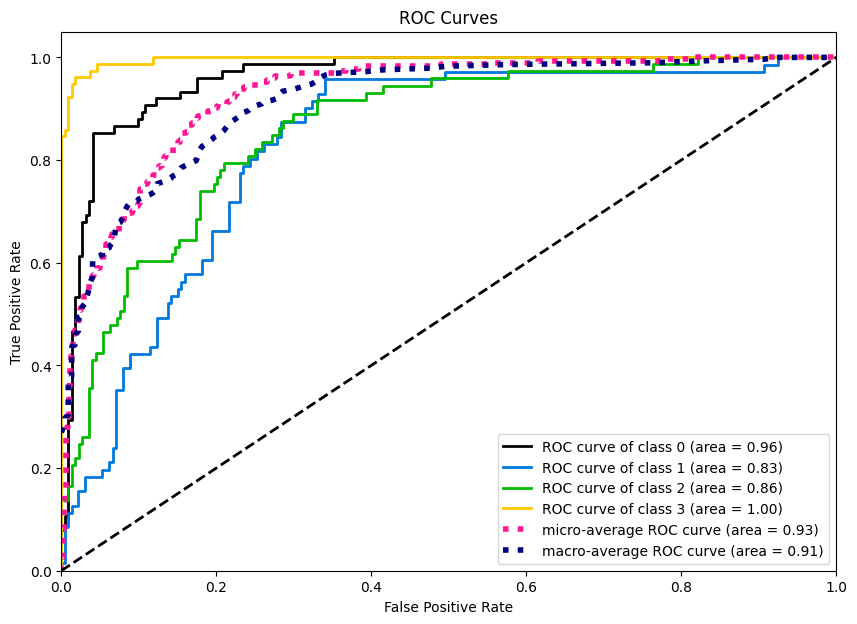

In [ ]:
plot_roc(y_test, best_estim_lr.predict_proba(X_test_new), figsize=(10, 7))

#### 2.5. Decision tree

In [ ]:
tree = DecisionTreeClassifier()
grid = {"max_depth":np.arange(1, 20)}
grid_search = GridSearchCV(tree, grid)
grid_search.fit(X_train_new, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [ ]:
best_estim_tree = grid_search.best_estimator_

print('Best score: ', grid_search.best_score_)
print('Best params: ', grid_search.best_params_)
print('Train:')
print('accuracy: ', accuracy_score(y_train, best_estim_tree.predict(X_train_new)))
print('f1 score: ', f1_score(y_train, best_estim_tree.predict(X_train_new), average='weighted'))

print('Test:')
print('accuracy: ', accuracy_score(y_test, best_estim_tree.predict(X_test_new)))
print('f1 score: ', f1_score(y_test, best_estim_tree.predict(X_test_new), average='weighted'))

Best score:  0.595462885738115
Best params:  {'max_depth': 5}
Train:
accuracy:  0.7595628415300546
f1 score:  0.7569260609717064
Test:
accuracy:  0.6498316498316499
f1 score:  0.6349186013410756


<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

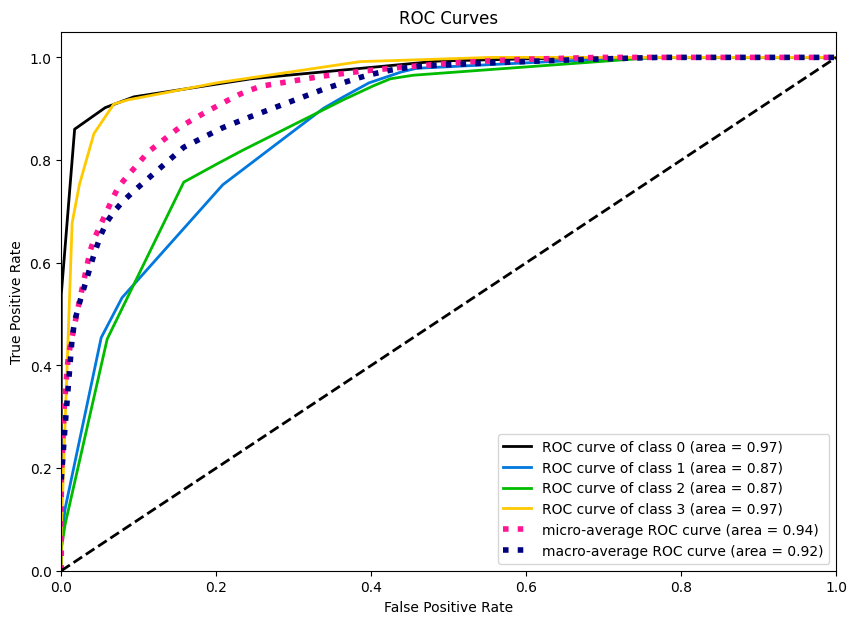

In [ ]:
plot_roc(y_train, best_estim_tree.predict_proba(X_train_new), figsize=(10, 7))

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

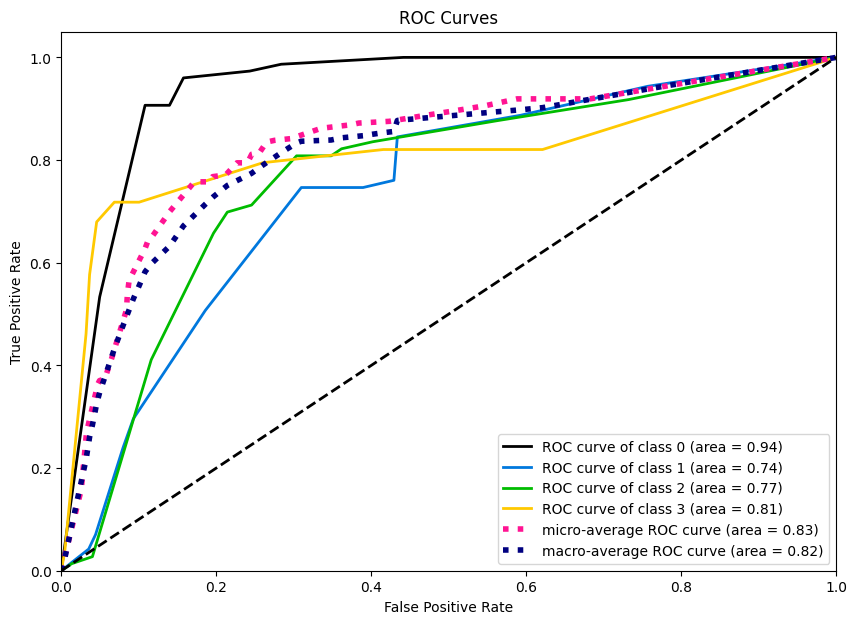

In [ ]:
plot_roc(y_test, best_estim_tree.predict_proba(X_test_new), figsize=(10, 7))

#### 2.6. Bagging.

In [ ]:
N = np.arange(2, 100, 5)
scores_f1 = []
scores_accuracy = []

for i in range(len(N)):
  model = BaggingClassifier(base_estimator=best_estim_lr, n_jobs=-1, n_estimators=N[i]).fit(X_train_new, y_train)
  prediction = model.predict(X_test_new)
  scores_accuracy.append(accuracy_score(y_test, prediction))
  scores_f1.append(f1_score(y_test, prediction, average='weighted'))

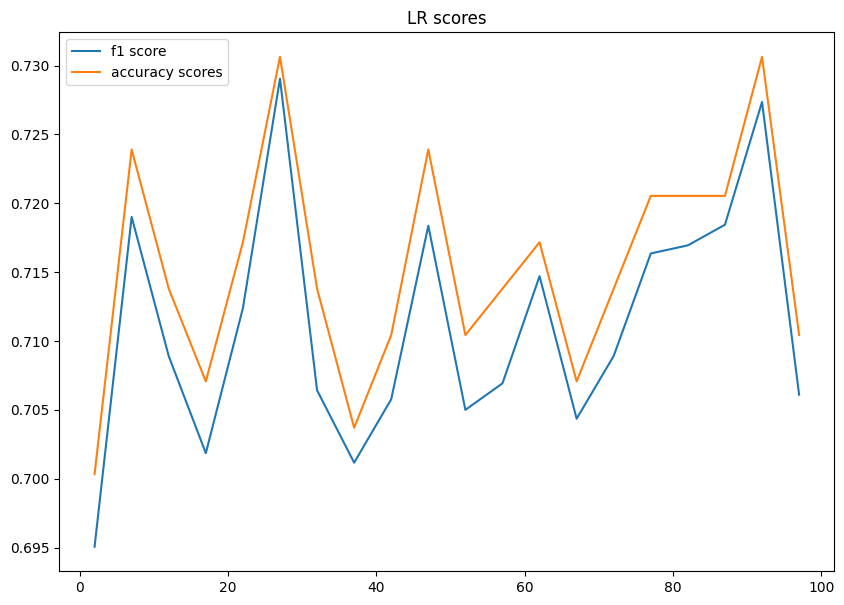

In [ ]:
N = np.arange(2, 100, 5)
plt.figure(figsize=(10, 7))
plt.plot(N, scores_f1, label='f1 score')
plt.plot(N, scores_accuracy, label='accuracy scores')
plt.title('LR scores')
plt.legend()

In [ ]:
N = np.arange(2, 100, 5)
scores_f1 = []
scores_accuracy = []

for i in range(len(N)):
  model = BaggingClassifier(base_estimator=best_estim_tree, n_jobs=-1, n_estimators=N[i]).fit(X_train_new, y_train)
  prediction = model.predict(X_test_new)
  scores_accuracy.append(accuracy_score(y_test, prediction))
  scores_f1.append(f1_score(y_test, prediction, average='weighted'))

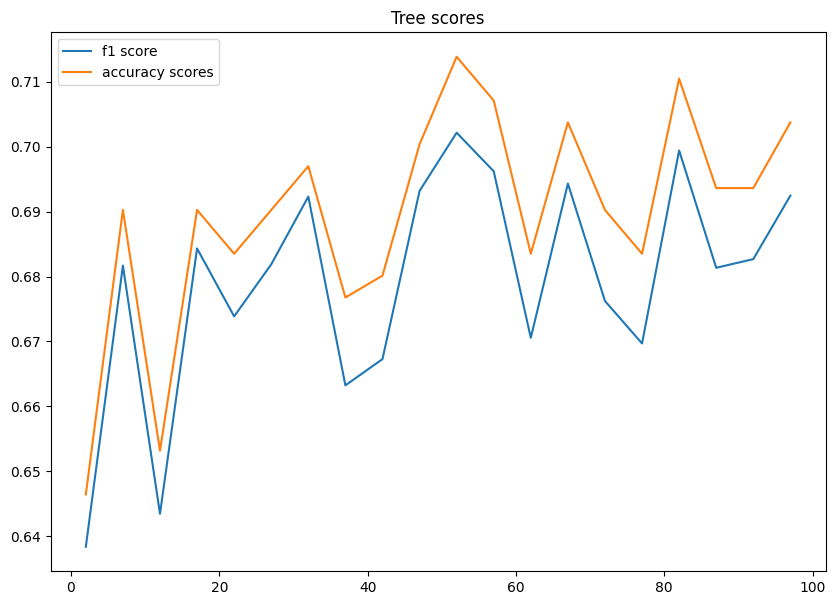

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(N, scores_f1, label='f1 score')
plt.plot(N, scores_accuracy, label='accuracy scores')
plt.title('Tree scores')
plt.legend()

We see that in logistic regression, the best parameter n_estimators is approximately 25, while trees have approximately 52, because the error is the smallest with these parameters. In answer to the second question, we can say that the tree depth in decision trees is compensated by the number of trees in ensembles, so we cannot say that these parameters somehow depend on each other or that some values are optimal for others.

#### 2.7. Random Forest

In [ ]:
scores_f1 = []
scores_accuracy = []

for i in range(len(N)):
  model = RandomForestClassifier(n_estimators=N[i]).fit(X_train_new, y_train)
  prediction = model.predict(X_test_new)
  scores_accuracy.append(accuracy_score(y_test, prediction))
  scores_f1.append(f1_score(y_test, prediction, average='weighted'))

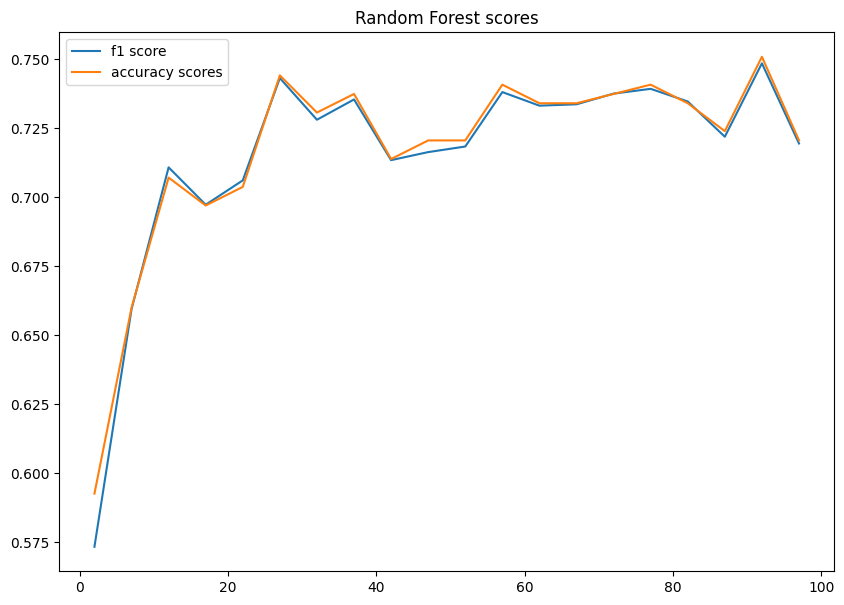

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(N, scores_f1, label='f1 score')
plt.plot(N, scores_accuracy, label='accuracy scores')
plt.title('Random Forest scores')
plt.legend()

In fact, as you can see from the graph, the value for the random forest is approximately 92, which is more similar to the value we got from catboost and xgboost than from logistic regression and decision trees.

#### 2.8. Learning curve

In [ ]:
one_size = int(X_train_new.shape[0] / 10)
scores_f1 = [[] for i in range(3)]
scores_accuracy = [[] for i in range(3)]

for i in range(1, 11):
  model = BaggingClassifier(base_estimator=best_estim_lr, n_jobs=-1, n_estimators=one_size).fit(X_train_new[:one_size * i], y_train[:one_size * i])
  prediction = model.predict(X_test_new)
  scores_accuracy[0].append(accuracy_score(y_test, prediction))
  scores_f1[0].append(f1_score(y_test, prediction, average='weighted'))

  model = BaggingClassifier(base_estimator=best_estim_tree, n_jobs=-1, n_estimators=one_size).fit(X_train_new[:one_size * i], y_train[:one_size * i])
  prediction = model.predict(X_test_new)
  scores_accuracy[1].append(accuracy_score(y_test, prediction))
  scores_f1[1].append(f1_score(y_test, prediction, average='weighted'))

  model = RandomForestClassifier(n_estimators=one_size).fit(X_train_new[:one_size * i], y_train[:one_size * i])
  prediction = model.predict(X_test_new)
  scores_accuracy[2].append(accuracy_score(y_test, prediction))
  scores_f1[2].append(f1_score(y_test, prediction, average='weighted'))

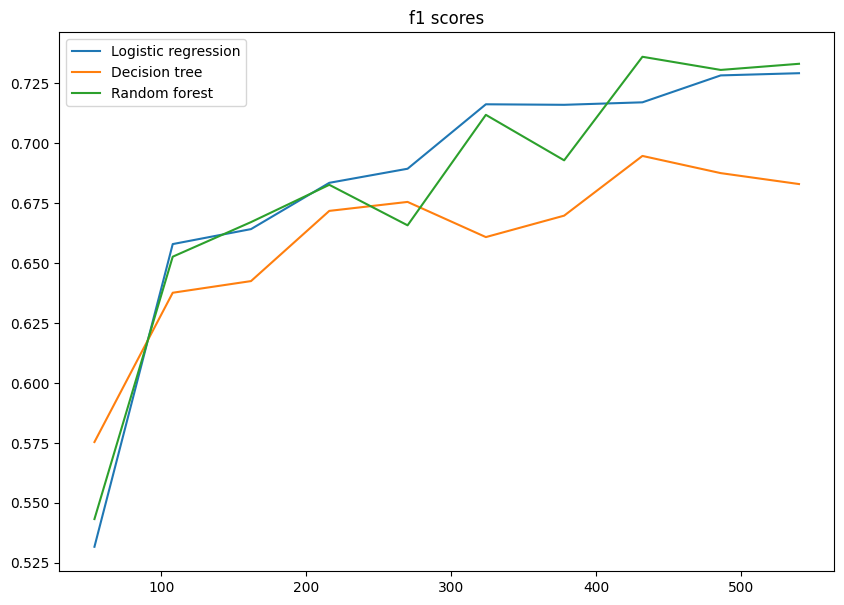

In [ ]:
plt.figure(figsize=(10,7))
sizes = [i * one_size for i in range(1, 11)]
plt.plot(sizes, scores_f1[0], label="Logistic regression")
plt.plot(sizes, scores_f1[1], label="Decision tree")
plt.plot(sizes, scores_f1[2], label="Random forest")
plt.title("f1 scores")
plt.legend()

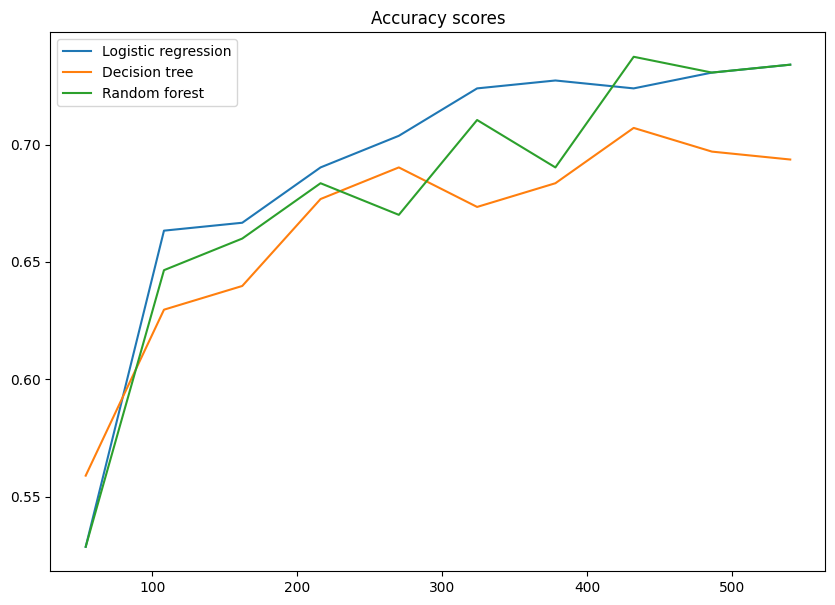

In [ ]:
plt.figure(figsize=(10,7))
sizes = [i * one_size for i in range(1, 11)]
plt.plot(sizes, scores_accuracy[0], label="Logistic regression")
plt.plot(sizes, scores_accuracy[1], label="Decision tree")
plt.plot(sizes, scores_accuracy[2], label="Random forest")
plt.title("Accuracy scores")
plt.legend()

We see that the random forest performed best in all evaluations. It trains faster and, with a large sample size, appears to be more stable than logical regression and decision trees.

#### 2.9. Boosting

In [ ]:
!pip install catboost
!pip install xgboost

In [ ]:
from catboost import CatBoostClassifier
import xgboost as xgb
N = np.arange(2, 100, 5)
scores_f1 = []
scores_accuracy = []

param_grid = {
    'n_estimators': N
}

for i in range(len(N)):
  model = CatBoostClassifier(iterations=100,
                           depth=7,
                           learning_rate=1,
                           loss_function='MultiClass',
                           verbose=True)
  model.fit(X_train_new, y_train)
  boosted_model = xgb.XGBClassifier(n_estimators=N[i], learning_rate=0.1)
  boosted_model.fit(X_train_new, y_train)
  prediction = boosted_model.predict(X_test_new)
  scores_accuracy.append(accuracy_score(y_test, prediction))
  scores_f1.append(f1_score(y_test, prediction, average='weighted'))

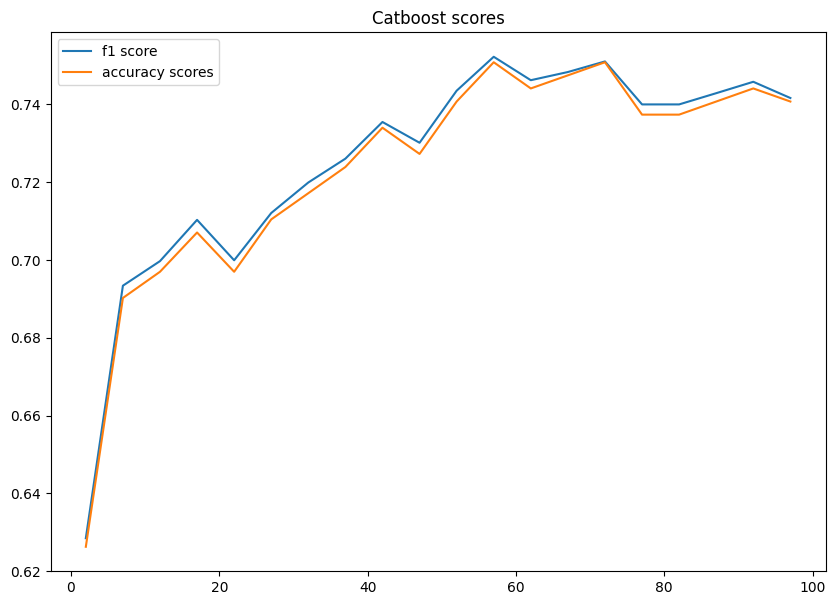

In [ ]:
plt.figure(figsize=(10, 7))
plt.plot(N, scores_f1, label='f1 score')
plt.plot(N, scores_accuracy, label='accuracy scores')
plt.title('Catboost scores')
plt.legend()

In [ ]:
N = np.arange(2, 100, 5)

param_grid = {
    'n_estimators': N
}

catboost_model = CatBoostClassifier(iterations=100, depth=7, learning_rate=1, loss_function='MultiClass', verbose=True)

xgb_model = xgb.XGBClassifier(learning_rate=0.1)


grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_new, y_train)

print("Best n_estimators:", grid_search.best_params_['n_estimators'])
print("Best accuracy:", grid_search.best_score_)

optimal_n_estimators = grid_search.best_params_['n_estimators']
catboost_model.fit(X_train_new, y_train)
xgb_model.n_estimators = optimal_n_estimators
xgb_model.fit(X_train_new, y_train)

prediction = xgb_model.predict(X_test_new)
accuracy = accuracy_score(y_test, prediction)
f1 = f1_score(y_test, prediction, average='weighted')
print("Accuracy with best parameter: " + str(accuracy))
print("f1 with best parameter: " + str(f1))